<a href="https://colab.research.google.com/github/fellow-coder/melusi-zwane/blob/main/Trading_strategy_technical_analysis_for_facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Use the relative strength index (RSI) and Python to determine if XRP is holding UP towards the USA currency


In [13]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving FB.csv to FB (1).csv


In [15]:
#store the data
FB = pd.read_csv('FB.csv')
#show the data
FB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2424,2022-01-05,333.019989,335.760010,323.839996,324.170013,324.170013,20564500
2425,2022-01-06,322.820007,339.170013,322.720001,332.459991,332.459991,27962800
2426,2022-01-07,332.739990,337.000000,328.880005,331.790009,331.790009,14711400
2427,2022-01-10,325.309998,328.339996,315.429993,328.070007,328.070007,24942400


In [16]:
#set the date as the data
FB = FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB

,Date,Open,High,Low,Close,Adj Close,Volume
2012-05-18,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2022-01-05,2022-01-05,333.019989,335.760010,323.839996,324.170013,324.170013,20564500
2022-01-06,2022-01-06,322.820007,339.170013,322.720001,332.459991,332.459991,27962800
2022-01-07,2022-01-07,332.739990,337.000000,328.880005,331.790009,331.790009,14711400
2022-01-10,2022-01-10,325.309998,328.339996,315.429993,328.070007,328.070007,24942400


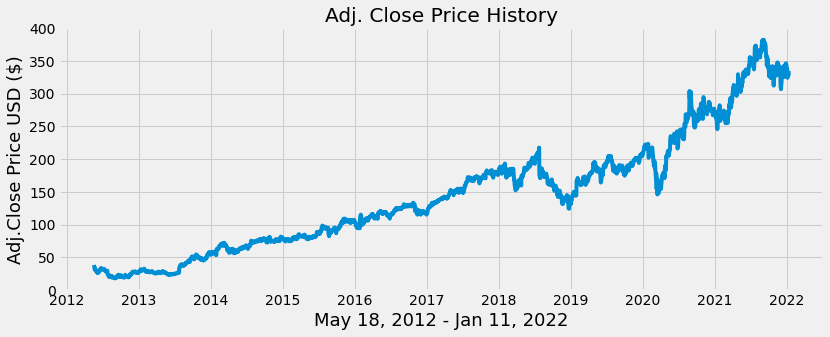

In [18]:
#visually show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(FB.index, FB['Adj Close'], label = 'Adj Close')
plt.title('Adj. Close Price History')
plt.xlabel('May 18, 2012 - Jan 11, 2022', fontsize = 18)
plt.ylabel('Adj.Close Price USD ($)', fontsize = 18)
plt.show()

In [20]:
#prepare the data to calculate  the RSI

#get the diffence in price
delta = FB ['Adj Close']. diff(1)
delta

2012-05-18          NaN
2012-05-21    -4.200001
2012-05-22    -3.029999
2012-05-23     1.000000
2012-05-24     1.029999
                ...    
2022-01-05   -12.359986
2022-01-06     8.289978
2022-01-07    -0.669982
2022-01-10    -3.720002
2022-01-11     6.299988
Name: Adj Close, Length: 2429, dtype: float64

In [22]:
#get rid of NaN
delta = delta.dropna()
delta

2012-05-21    -4.200001
2012-05-22    -3.029999
2012-05-23     1.000000
2012-05-24     1.029999
2012-05-25    -1.119999
                ...    
2022-01-05   -12.359986
2022-01-06     8.289978
2022-01-07    -0.669982
2022-01-10    -3.720002
2022-01-11     6.299988
Name: Adj Close, Length: 2428, dtype: float64

In [24]:
#get the positive gains (up) and the negative gains(down)
up = delta.copy()
down = delta.copy()

up[up<0]= 0
down[down > 0] = 0

In [26]:
#get the time period
period = 14
#Calculate the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [27]:
#Calculate the RSI

#Calculate the Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
#Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0+ RS))

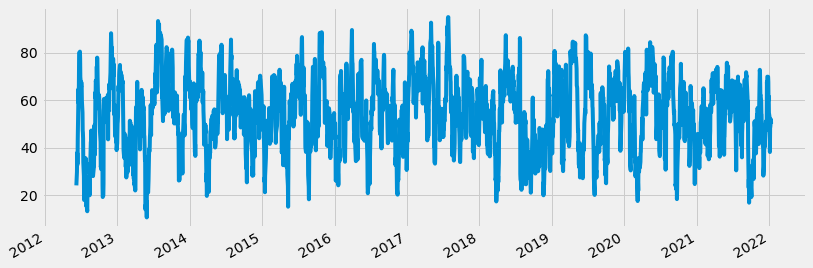

In [30]:
#Show the RSI Visually
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [31]:
#Put it all together

#create a new data frame
new_df = pd.DataFrame()
new_df['Adj Close'] = FB['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close,RSI
2012-05-18,38.230000,NaN
2012-05-21,34.029999,NaN
2012-05-22,31.000000,NaN
2012-05-23,32.000000,NaN
2012-05-24,33.029999,NaN
...,...,...
2022-01-05,324.170013,38.142369
2022-01-06,332.459991,48.379380
2022-01-07,331.790009,48.663814
2022-01-10,328.070007,51.865564


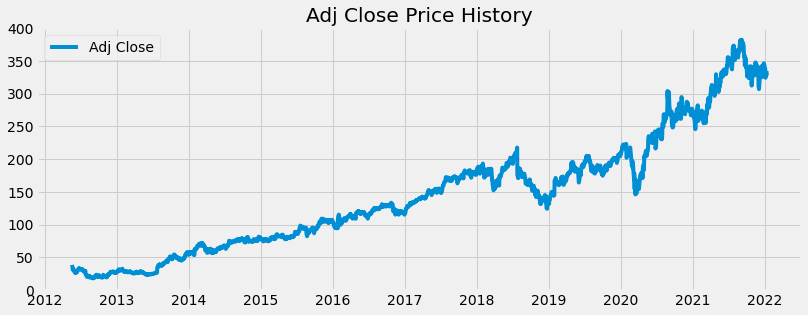

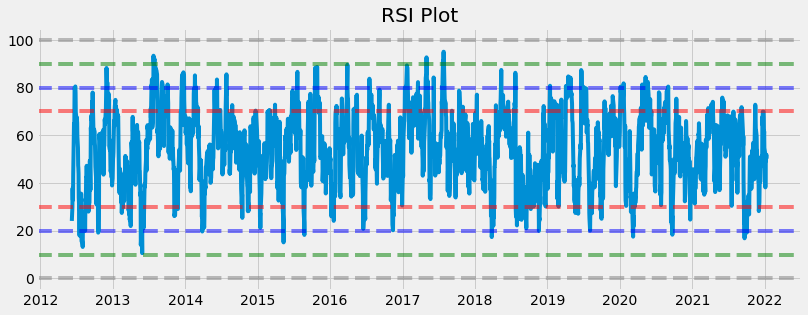

In [34]:
#visually show the ajusted close price and RSI 

#plot the adjusted close price
plt.figure(figsize=(12.2, 4.5 ))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()
#plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--',alpha = 0.5, color='grey')
plt.axhline(10, linestyle='--',alpha = 0.5, color='green')
plt.axhline(20, linestyle='--',alpha = 0.5, color='blue')
plt.axhline(30, linestyle='--',alpha = 0.5, color='red')
plt.axhline(70, linestyle='--',alpha = 0.5, color='red')
plt.axhline(80, linestyle='--',alpha = 0.5, color='blue')
plt.axhline(90, linestyle='--',alpha = 0.5, color='green')
plt.axhline(100, linestyle='--',alpha = 0.5, color='grey')
plt.show()